# 1. Import libraries and read data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats
import statsmodels.stats.multicomp as mc

In [240]:
from sklearn.preprocessing import PowerTransformer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

In [4]:
df=pd.read_csv('telecom_churn.csv')

# 2. Understand data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
df.shape

(3333, 20)

In [8]:
df.size

66660

## Inference

1. There are 3333 rows and 20 columns.
2. We can see that there is no null values.

# 3. Check for duplicates

In [11]:
print(f'Total duplicate rows are {df.duplicated().sum()}')

Total duplicate rows are 0


##### So there is no duplicate rows.

# 4. Check for datatypes

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [15]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Inference

All columns are with appropriate datatypes except 'area code'.

In [17]:
df['Area code']=df['Area code'].astype('object')

# 5. Check for anamolies.

In [19]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [20]:
for i in df.columns:
    print(f'Total no. of unique values in {i} are {df[i].nunique()}')
    print(df[i].unique())
    print()

Total no. of unique values in State are 51
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

Total no. of unique values in Account length are 212
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 17

## Inference

I didnt see any anamolies in this data.

# 6. Check for null values

In [23]:
print(f'Total null values are {df.isnull().sum().sum()}')

Total null values are 0


## Inference

As already mentioned there is no null values.

# 7. Feature engineering.

In [26]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


We can add up all the day,eve and night calls,charge,minutes tot get overall view.

In [28]:
df['Total local calls']=df['Total day calls']+df['Total eve calls']+df['Total night calls']
df['Total local minutes']=df['Total day minutes']+df['Total eve minutes']+df['Total night minutes']
df['Total local charge']=df['Total day charge']+df['Total eve charge']+df['Total night charge']

In [29]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total local calls,Total local minutes,Total local charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,False,300,707.2,72.86
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,False,329,611.5,55.54
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,False,328,527.2,59.00
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,False,248,558.2,65.02
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,False,356,501.9,49.36


# 8. Seperating num and col

In [31]:
num=df.select_dtypes(include=np.number).columns.to_list()
cat=df.select_dtypes(exclude=np.number).columns.to_list()

In [32]:
num,cat

(['Account length',
  'Number vmail messages',
  'Total day minutes',
  'Total day calls',
  'Total day charge',
  'Total eve minutes',
  'Total eve calls',
  'Total eve charge',
  'Total night minutes',
  'Total night calls',
  'Total night charge',
  'Total intl minutes',
  'Total intl calls',
  'Total intl charge',
  'Customer service calls',
  'Total local calls',
  'Total local minutes',
  'Total local charge'],
 ['State', 'Area code', 'International plan', 'Voice mail plan', 'Churn'])

# 9. Statistical Analysis.

In [34]:
df[num].describe()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Total local calls,Total local minutes,Total local charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,300.657666,581.627483,56.685173
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,34.328232,89.969330,10.487816
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,188.000000,275.200000,19.980000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,278.000000,521.000000,49.590000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,301.000000,583.100000,56.630000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,324.000000,642.500000,63.650000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,410.000000,876.900000,92.560000


## Inference

1. The charges are decreasing among Day,eve and night with night having the lowest mean charge.
2. The mean minutes of day is less than eve and night where those two have approximately quale mean.

In [36]:
df[cat].describe()

,State,Area code,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333,3333
unique,51,3,2,2,2
top,WV,415,No,No,False
freq,106,1655,3010,2411,2850


## Inferenece

1. 106 data belonged to state 'WV'
2. Area code '415' is the highest.
3. Only 323 people are opting for internaltional plan.
4. 2411 have not opted for voice mail plan.
5. 2850 have not churned.

In [38]:
for i in num:
    print(f'The skew and kurt of {i.upper()} is {df[i].skew()} and {df[i].kurt()}')
    print()

The skew and kurt of ACCOUNT LENGTH is 0.09660629423135147 and -0.10783598057434673

The skew and kurt of NUMBER VMAIL MESSAGES is 1.2648236337102594 and -0.05112853878624479

The skew and kurt of TOTAL DAY MINUTES is -0.029077067143188955 and -0.019940378849473195

The skew and kurt of TOTAL DAY CALLS is -0.11178663903979906 and 0.2431815245893083

The skew and kurt of TOTAL DAY CHARGE is -0.029083268343274994 and -0.01981178724473187

The skew and kurt of TOTAL EVE MINUTES is -0.023877456078123447 and 0.02562975284428992

The skew and kurt of TOTAL EVE CALLS is -0.05556313904148763 and 0.20615646799830145

The skew and kurt of TOTAL EVE CHARGE is -0.02385798900760956 and 0.025487404808580916

The skew and kurt of TOTAL NIGHT MINUTES is 0.008921291065494056 and 0.08581607799184665

The skew and kurt of TOTAL NIGHT CALLS is 0.03249957015209059 and -0.07201957894134292

The skew and kurt of TOTAL NIGHT CHARGE is 0.008886236769217034 and 0.08566317984047211

The skew and kurt of TOTAL IN

## Inference

1. NUMBER VMAIL MESSAGES,TOTAL INTL CALLS and CUSTOMER SERVICE CALLS are having skewness > 1.
2. TOTAL INTL CALLS have the normal kurt

# 10. Check for outliers.

In [41]:
for i in num:
    print(f'No. of outliers of {i.upper()} is',end=' ')
    iqr=(df[i].quantile(0.75)-df[i].quantile(0.25))
    lw,uw=df[i].quantile(0.25)-(1.5*iqr),df[i].quantile(0.75)+(1.5*iqr)
    print(df[(df[i]<lw) | (df[i]>uw)].count()[0],end='\n\n')

No. of outliers of ACCOUNT LENGTH is 18

No. of outliers of NUMBER VMAIL MESSAGES is 1

No. of outliers of TOTAL DAY MINUTES is 25

No. of outliers of TOTAL DAY CALLS is 23

No. of outliers of TOTAL DAY CHARGE is 25

No. of outliers of TOTAL EVE MINUTES is 24

No. of outliers of TOTAL EVE CALLS is 20

No. of outliers of TOTAL EVE CHARGE is 24

No. of outliers of TOTAL NIGHT MINUTES is 30

No. of outliers of TOTAL NIGHT CALLS is 22

No. of outliers of TOTAL NIGHT CHARGE is 30

No. of outliers of TOTAL INTL MINUTES is 46

No. of outliers of TOTAL INTL CALLS is 78

No. of outliers of TOTAL INTL CHARGE is 49

No. of outliers of CUSTOMER SERVICE CALLS is 267

No. of outliers of TOTAL LOCAL CALLS is 16

No. of outliers of TOTAL LOCAL MINUTES is 16

No. of outliers of TOTAL LOCAL CHARGE is 27



## Inference

Column 'CUSTOMER SERVICE CALLS' is having most outliers which is equal to 267.

# 11. Missing Value Treatment

As there is no missing values, there is no need of treating the missing values.

# 12. Deep Analysis.

In [46]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total local calls,Total local minutes,Total local charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,False,300,707.2,72.86
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,False,329,611.5,55.54
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,False,328,527.2,59.00
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,False,248,558.2,65.02
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,False,356,501.9,49.36


## Univariate:

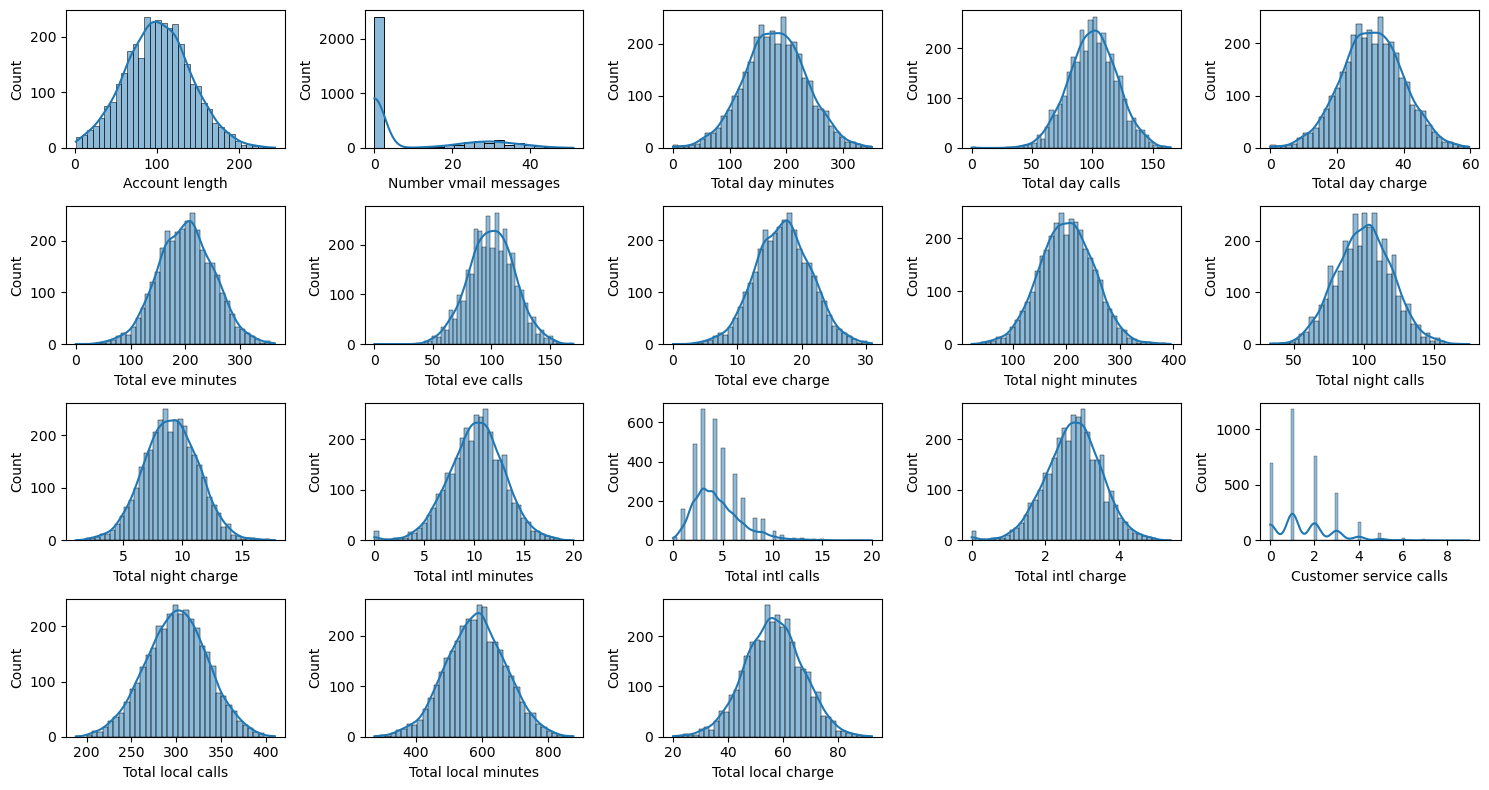

In [48]:
t=1
for i in num:
    plt.subplot(4,5,t)
    sns.histplot(df[i],kde=True)
    t+=1
plt.tight_layout()
plt.show()

NUMBER VMAIL MESSAGES,TOTAL INTL CALLS and CUSTOMER SERVICE CALLS are positively skewed.

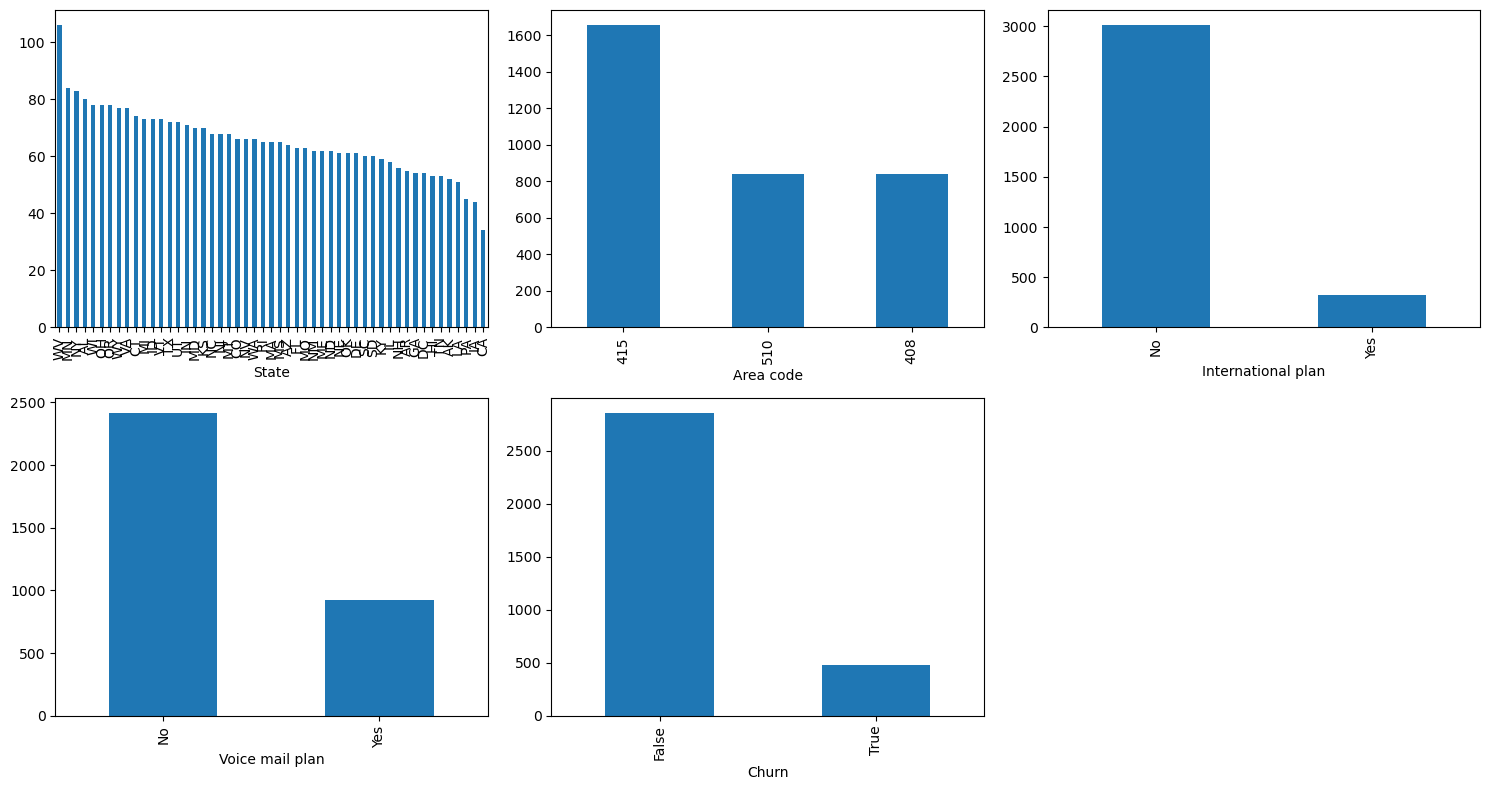

In [50]:
t=1
for i in cat:
    plt.subplot(2,3,t)
    df[i].value_counts().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()
    
    


1. WV state has most of the customers.
3. Area  Code '415' has more number of account.
4. Most of the people are not opted for international plan
5. Voice mail plan are not opted by most of the people.
6. And most of them are not churned

## Bivariate

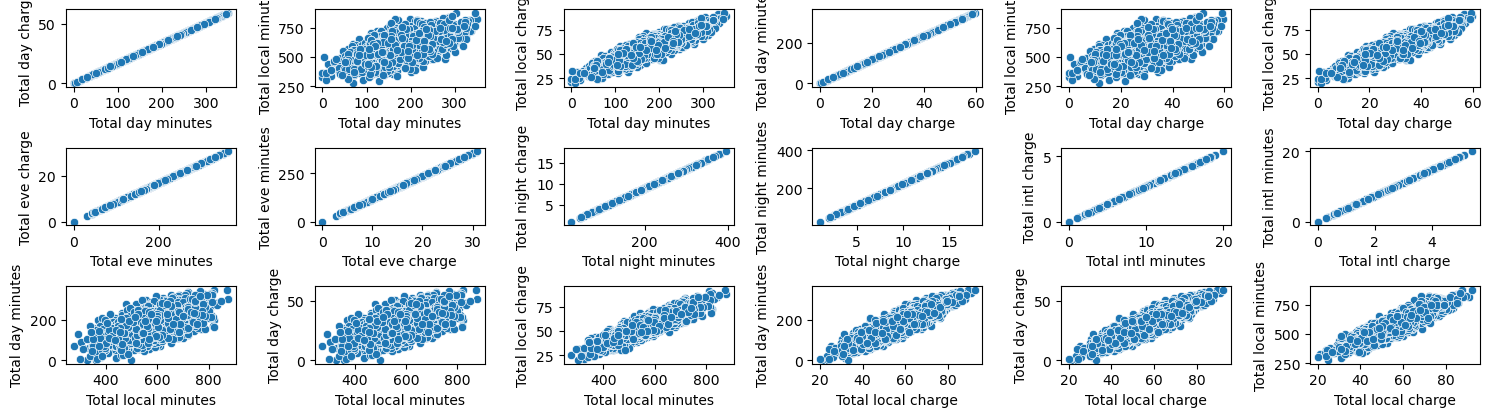

In [53]:
t=1
for i in num:
    for j in num:
        if i!=j:
            if (df[i].corr(df[j])>0.6) or  (df[i].corr(df[j])<-0.6):
                plt.subplot(6,6,t)
                sns.scatterplot(x=df[i],y=df[j])
                t+=1
plt.tight_layout()
plt.show()

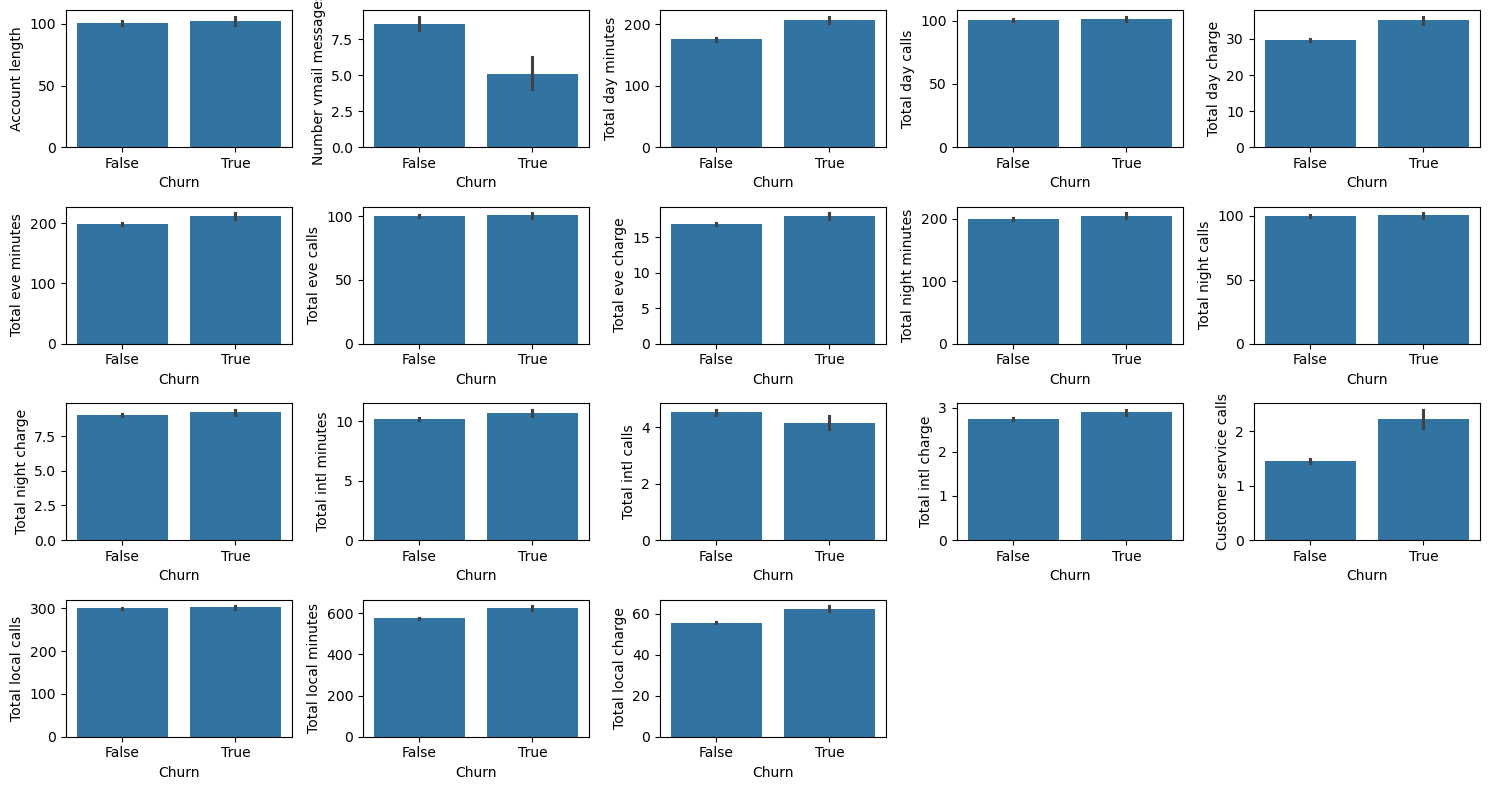

In [54]:
t=1
for i in num:
    plt.subplot(4,5,t)
    sns.barplot(x=df['Churn'],y=df[i])
    t+=1
plt.tight_layout()
plt.show()

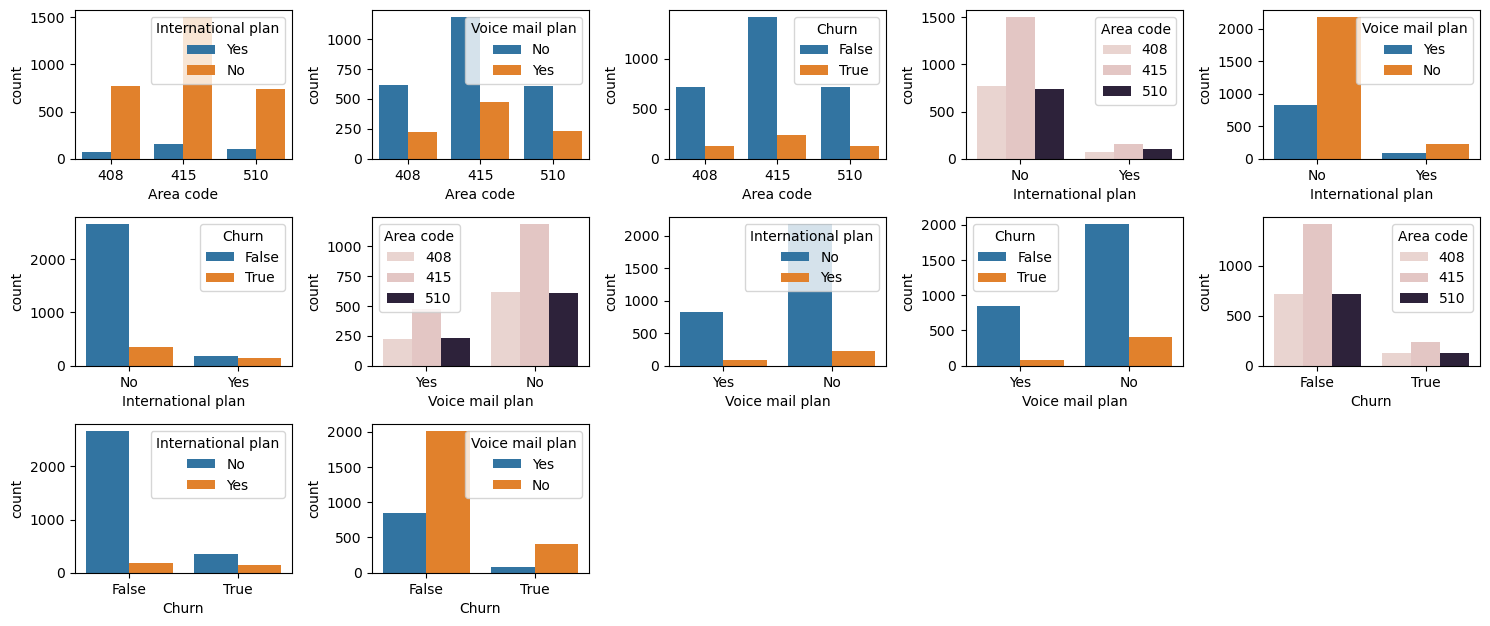

In [55]:
cat_exp_state=[x for x in cat if x!='State']
t=1
for i in cat_exp_state:
    for j in cat_exp_state:
        if i!=j:
            plt.subplot(4,5,t)
            sns.countplot(x=df[i],hue=df[j])
            t+=1
plt.tight_layout()
plt.show()

# Inference
1. Area code 415 have more customers and have more churns
2. Customers opting for international plan, have more possibilty to churn than customers not opting

## Multivariate

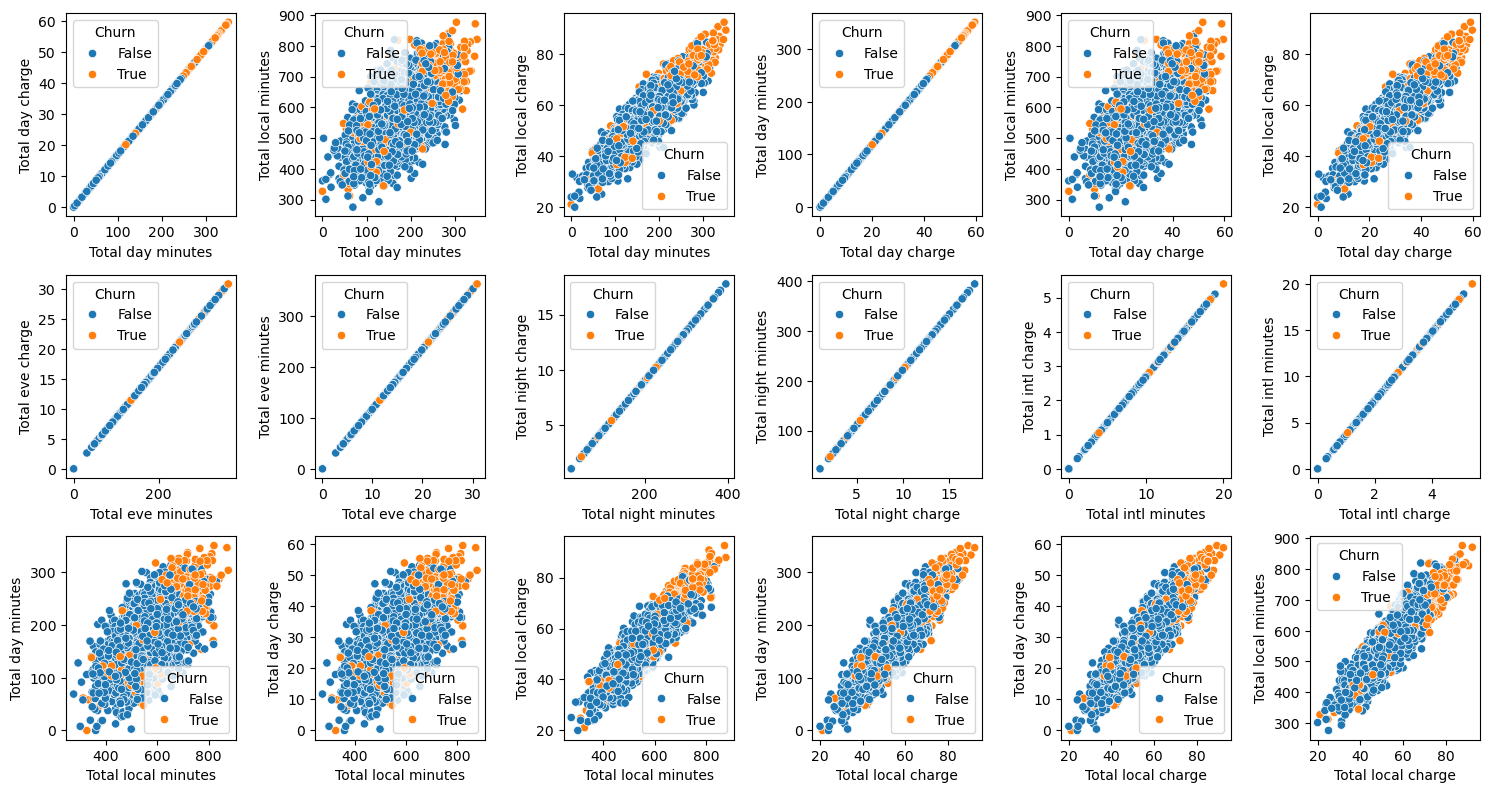

In [58]:
t=1
for i in num:
    for j in num:
        if i!=j:
            if (df[i].corr(df[j])>0.6) or  (df[i].corr(df[j])<-0.6):
                plt.subplot(3,6,t)
                sns.scatterplot(x=df[i],y=df[j],hue=df['Churn'])
                t+=1
plt.tight_layout()
plt.show()

Inference

Here in most of the plots, the churned customers are in the top-right corner, where the charges are higher and for higher duration.

# 13. Hypothesis testing

Considering churn as the target will do tests, with every other variables against churn

## two sample T-test

Confidence level = 95%

In [64]:
df['Churn']

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn, Length: 3333, dtype: bool

In [65]:
alp=0.05

In [66]:
def t_test_two(a,alt):
    num_different_mean=[]
    for i in a:
        churn_yes=df[df['Churn']==True][i]
        churn_no=df[df['Churn']==False][i]
        stat,p=stats.ttest_ind(a=churn_yes,b=churn_no,alternative=alt)
        if(p<alp):
            #print(f'For {i} means are different')
            num_different_mean.append(i)
        else:
            pass
            #print(f'For {i} means are same')
    return num_different_mean

In [67]:
# Two-sided
num_diff_mean=t_test_two(num,'two-sided')

In [68]:
# left
num_m1_gret_m2=t_test_two(num_diff_mean,'greater')

In [69]:
num_m1_less_m2=t_test_two(num_diff_mean,'less')

In [70]:
print(num_diff_mean,'Mean of churned people "greater than" mean of people who are not churned',num_m1_gret_m2,'Mean of churned people "less than" mean of people who are not churned',num_m1_less_m2,sep="\n\n")

['Number vmail messages', 'Total day minutes', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Total night minutes', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Total local minutes', 'Total local charge']

Mean of churned people "greater than" mean of people who are not churned

['Total day minutes', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Total night minutes', 'Total night charge', 'Total intl minutes', 'Total intl charge', 'Customer service calls', 'Total local minutes', 'Total local charge']

Mean of churned people "less than" mean of people who are not churned

['Number vmail messages', 'Total intl calls']


## Chi-square test

For comparing every category against churn

In [72]:
def chi_cont(a):
    depen_cat=[]
    for i in a:
        if i!='Churn':
            b=pd.crosstab(df[i],df['Churn'])
            stat,p,dof,expected=stats.chi2_contingency(b,correction=False)
            if (p<alp):
                depen_cat.append(i)
    return depen_cat

In [73]:
depend_cat=chi_cont(cat)

In [74]:
print(f'We can find that columns {depend_cat} are dependent on "Churn"')

We can find that columns ['State', 'International plan', 'Voice mail plan'] are dependent on "Churn"


# 14. Encoding

In [76]:
for i in cat:
    print(df[i].unique())

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
[415 408 510]
['No' 'Yes']
['Yes' 'No']
[False  True]


##### State column can be encoded using label encoder.

In [78]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()


In [79]:
df['State']=l.fit_transform(df['State'])

##### For area code, we just replace with 1,2,3 for 415,408,510 respectively.

In [81]:
df['Area code'].replace(to_replace=[415,408,510],value=[1,2,3],inplace=True)

For other columns, we use n-1 dummy encoder as they are binominal.

In [83]:
df['Churn_True']=pd.get_dummies(df['Churn'],drop_first=True,dtype='int',prefix='Churn',prefix_sep='_')

In [84]:
df.drop(columns='Churn',inplace=True)

In [85]:
df['International_plan_true']=pd.get_dummies(df['International plan'],drop_first=True,dtype='int',prefix='International plan',prefix_sep='_')

In [86]:
df.drop(columns='International plan',inplace=True)

In [87]:
df['Voice_mail_plan_True']=pd.get_dummies(df['Voice mail plan'],drop_first=True,dtype='int')

In [88]:
df.drop(columns='Voice mail plan',inplace=True)

##### After encoding, data set is like:

In [90]:
df.head()

,State,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Total local calls,Total local minutes,Total local charge,Churn_True,International_plan_true,Voice_mail_plan_True
0,16,128,1,25,265.1,110,45.07,197.4,99,16.78,...,10.0,3,2.70,1,300,707.2,72.86,0,0,1
1,35,107,1,26,161.6,123,27.47,195.5,103,16.62,...,13.7,3,3.70,1,329,611.5,55.54,0,0,1
2,31,137,1,0,243.4,114,41.38,121.2,110,10.30,...,12.2,5,3.29,0,328,527.2,59.00,0,0,0
3,35,84,2,0,299.4,71,50.90,61.9,88,5.26,...,6.6,7,1.78,2,248,558.2,65.02,0,1,0
4,36,75,1,0,166.7,113,28.34,148.3,122,12.61,...,10.1,3,2.73,3,356,501.9,49.36,0,1,0


# 15. Transormation

### From the univariate analysis, we can infer that NUMBER VMAIL MESSAGES,TOTAL INTL CALLS and CUSTOMER SERVICE CALLS are positively skewed. So we are going to use the yeo-johnson technique to normalise it.

In [93]:

p=PowerTransformer()

In [94]:
df['Number vmail messages']=p.fit_transform(df[['Number vmail messages']])
df['Total intl calls']=p.fit_transform(df[['Total intl calls']])
df['Customer service calls']=p.fit_transform(df[['Customer service calls']])

1.0002251991498143


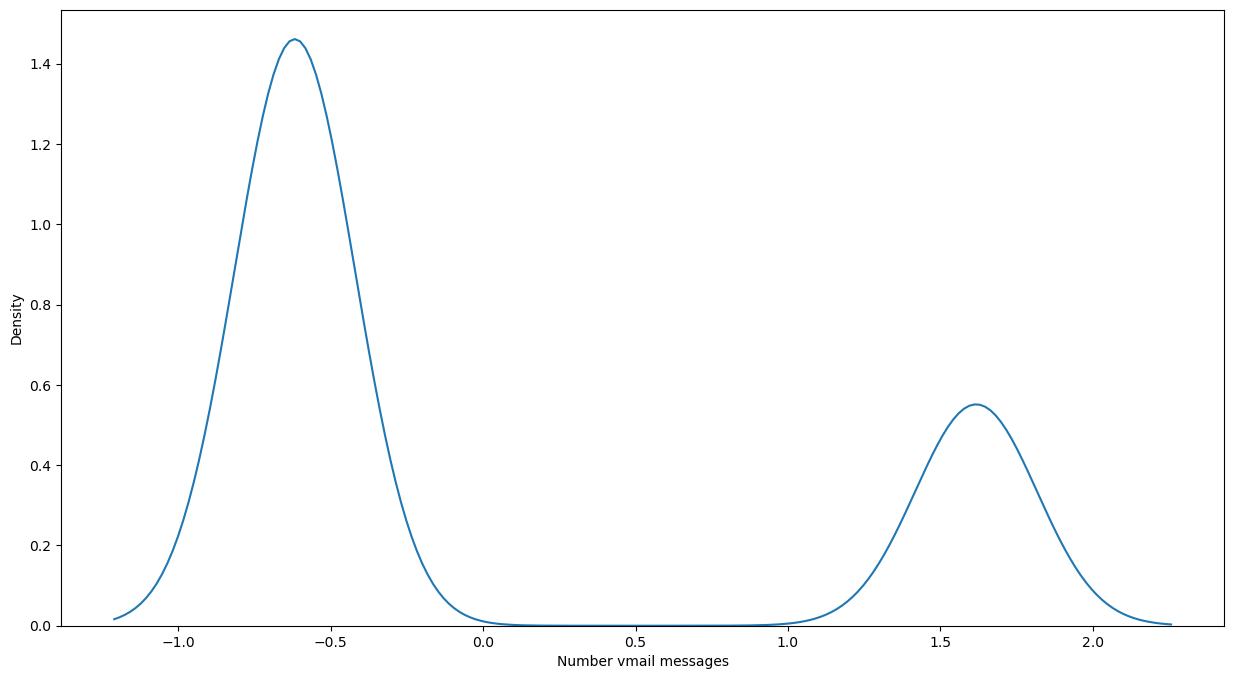

0.005816336230981385


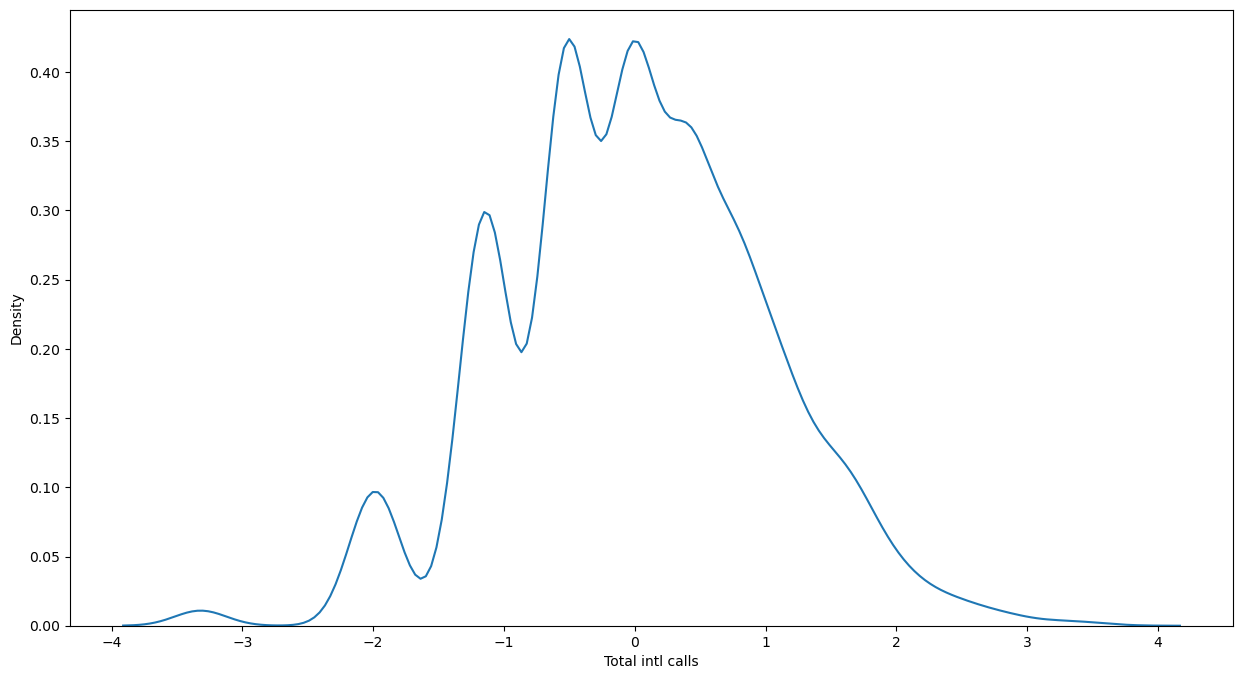

-0.013769810430804436


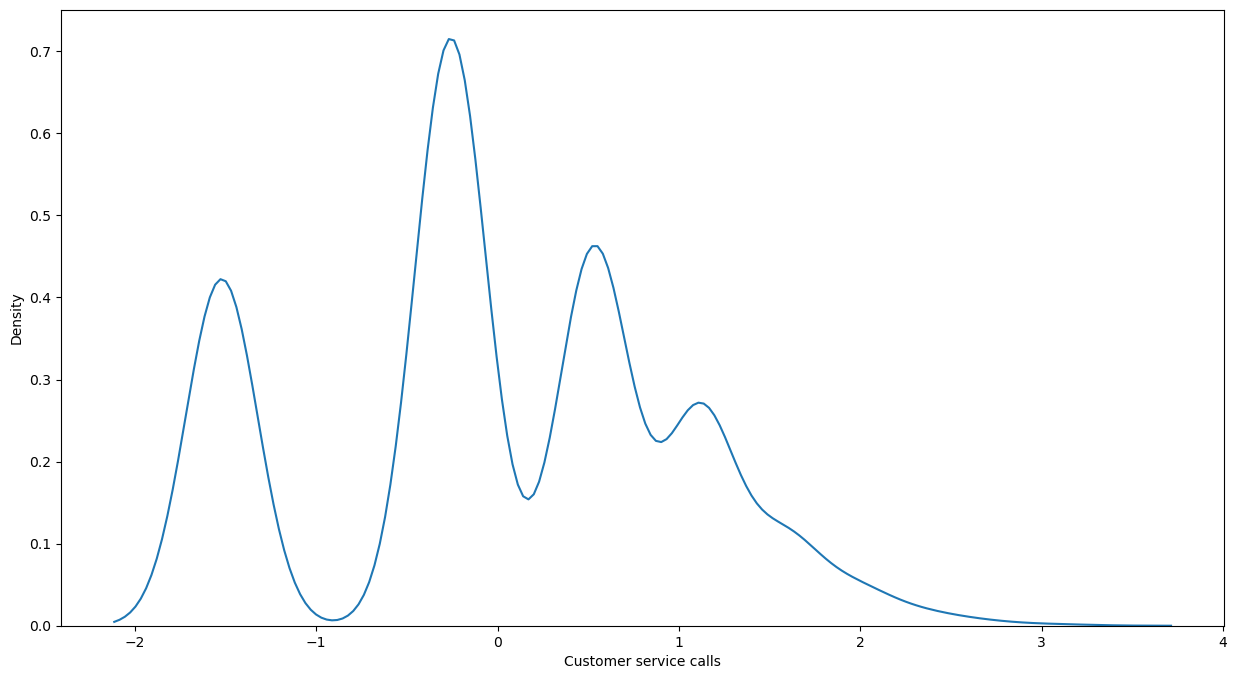

In [95]:
print(df['Number vmail messages'].skew())
sns.kdeplot(df['Number vmail messages'])
plt.show()
print(df['Total intl calls'].skew())
sns.kdeplot(df['Total intl calls'])
plt.show()
print(df['Customer service calls'].skew())
sns.kdeplot(df['Customer service calls'])
plt.show()

# 16. Train_test_split

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X=df.drop(columns='Churn_True')
Y=df['Churn_True']

In [99]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)


# 17. Scaling

In [101]:
df_scaled=df

In [102]:
for i in num:
    print(i)
    print(df[i].max()-df[i].min())

Account length
242
Number vmail messages
2.2834590131058468
Total day minutes
350.8
Total day calls
165
Total day charge
59.64
Total eve minutes
363.7
Total eve calls
170
Total eve charge
30.91
Total night minutes
371.8
Total night calls
142
Total night charge
16.73
Total intl minutes
20.0
Total intl calls
6.89551930998012
Total intl charge
5.4
Customer service calls
4.643129679228546
Total local calls
222
Total local minutes
601.7
Total local charge
72.58


##### Here standardized the data set using Standard Scalar.

In [104]:

s=StandardScaler()
for i in num:
    df_scaled[i]=s.fit_transform(df_scaled[[i]])

In [105]:
df_scaled

,State,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Total local calls,Total local minutes,Total local charge,Churn_True,International_plan_true,Voice_mail_plan_True
0,16,0.676489,1,1.608479,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,...,-0.085008,-0.521997,-0.085690,-0.257248,-0.019161,1.395935,1.542481,0,0,1
1,35,0.149065,1,1.612570,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,...,1.240482,-0.521997,1.241169,-0.257248,0.825751,0.332080,-0.109207,0,0,1
2,31,0.902529,1,-0.618292,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,...,0.703121,0.398354,0.697156,-1.521146,0.796617,-0.605047,0.220749,0,0,0
3,35,-0.428590,2,-0.618292,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,...,-1.303026,1.082022,-1.306401,0.532911,-1.534177,-0.260433,0.794835,0,1,0
4,36,-0.654629,1,-0.618292,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,...,-0.049184,-0.521997,-0.045885,1.117598,1.612394,-0.886296,-0.698551,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,2.283878,1,1.641756,-0.432895,-1.167924,-0.433386,0.286348,1.299506,0.286880,...,-0.120832,0.761444,-0.125496,0.532911,-0.427050,0.768961,0.071029,0,0,1
3329,49,-0.830437,1,-0.618292,0.942447,-2.164631,0.942714,-0.938353,-2.264816,-0.938172,...,-0.228304,-0.021619,-0.231645,1.117598,-1.912930,-0.064782,0.405753,0,0,0
3330,39,-1.835055,3,-0.618292,0.018820,0.426808,0.019193,1.731930,-2.114211,1.732349,...,1.383778,0.761444,1.387123,0.532911,-1.242827,0.887908,0.690889,0,0,0
3331,6,2.082955,3,-0.618292,0.624778,0.227466,0.625153,-0.816080,-0.808966,-0.815203,...,-1.876211,1.869863,-1.876950,0.532911,0.738347,-0.767349,-0.048175,0,1,0


In [106]:
for i in num:
    print(i)
    print(df_scaled[i].max()-df_scaled[i].min())

Account length
6.077938525790959
Number vmail messages
2.2834590131058468
Total day minutes
6.441517433556019
Total day calls
8.22283450215782
Total day charge
6.44196452397036
Total eve minutes
7.172687790778193
Total eve calls
8.534292332548622
Total eve charge
7.171658909215324
Total night minutes
7.352728931833688
Total night calls
7.257608571631888
Total night charge
7.3521288355770125
Total intl minutes
7.164810379857705
Total intl calls
6.89551930998012
Total intl charge
7.165039127992879
Customer service calls
4.643129679228546
Total local calls
6.46795072123344
Total local minutes
6.688838143698085
Total local charge
6.921449649496545


##### The range has been reduced for every numeric columns.

# 18. Modeling

In [192]:

xgb=XGBClassifier(random_state=10)
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [194]:
ypred_xgb=xgb.predict(xtest)

In [198]:
ypred_xgb_train=xgb.predict(xtrain)

In [200]:
print(accuracy_score(ytrain,ypred_xgb_train))
print(confusion_matrix(ytrain,ypred_xgb_train))
print(classification_report(ytrain,ypred_xgb_train))
      

1.0
[[1987    0]
 [   0  346]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1987
           1       1.00      1.00      1.00       346

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333



In [202]:
print(accuracy_score(ytest,ypred_xgb))
print(confusion_matrix(ytest,ypred_xgb))
print(classification_report(ytest,ypred_xgb))

0.976
[[861   2]
 [ 22 115]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       863
           1       0.98      0.84      0.91       137

    accuracy                           0.98      1000
   macro avg       0.98      0.92      0.95      1000
weighted avg       0.98      0.98      0.98      1000



##### The normal model is overfitted as the accuracy is 1 for train set.

##### Using Grid search for finding the best hyper parameters.

In [208]:
params =             [{'n_estimators': [100,125,90],
                     'learning_rate': [0.1, 0.01,0.001],
                     'max_depth': [3, 4],
                     'min_samples_split': [8, 10],
                     'min_weight_fraction_leaf': [0.5, 0.6]}]




xgb_cv=GridSearchCV(xgb,params,cv=5,scoring='accuracy')

xgb_cv.fit(xtrain,ytrain)

xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.5,
 'n_estimators': 90}

In [210]:
xgb=XGBClassifier(random_state=10,learning_rate= 0.1,max_depth= 4,min_samples_split=8,min_weight_fraction_leaf= 0.5,n_estimators= 90)

In [212]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, min_samples_split=8,
              min_weight_fraction_leaf=0.5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=90,
              n_jobs=None, ...)

In [214]:
ypred_xgb=xgb.predict(xtest)

In [218]:
ypred_xgb_train=xgb.predict(xtrain)

In [220]:
print(accuracy_score(ytrain,ypred_xgb_train))
print(confusion_matrix(ytrain,ypred_xgb_train))
print(classification_report(ytrain,ypred_xgb_train))
      

0.9802828975567939
[[1987    0]
 [  46  300]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1987
           1       1.00      0.87      0.93       346

    accuracy                           0.98      2333
   macro avg       0.99      0.93      0.96      2333
weighted avg       0.98      0.98      0.98      2333



In [222]:
print(accuracy_score(ytest,ypred_xgb))
print(confusion_matrix(ytest,ypred_xgb))
print(classification_report(ytest,ypred_xgb))

0.976
[[862   1]
 [ 23 114]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       863
           1       0.99      0.83      0.90       137

    accuracy                           0.98      1000
   macro avg       0.98      0.92      0.95      1000
weighted avg       0.98      0.98      0.98      1000



##### Here the train accuracy is 0.98 and test accuracy is 0.976, thus model is best fit.